Deep Learning Basic_2

*머신러닝 keyword - 데이터, 학습, 예측

*딥러닝 keyword - 인공신경망(인간의 뇌를 표방), 데이터, 학습, 예측

In [1]:
import tensorflow as tf
import numpy as np

x = np.array([2, 4, 6, 8, 10,
                   12, 14, 16, 18, 20]).astype('float32')
#예제 학습 데이터

y = np.array([0, 0, 0, 0, 0,
                   0, 1, 1, 1, 1]).astype('float32')
#예제 정답 데이터(x 데이터가 14 이상이면 1 값을 취하는 pattern)

In [3]:
#모델링 연습

md = tf.keras.models.Sequential()

md.add(tf.keras.layers.Dense(8, input_shape = (1,), activation = 'sigmoid'))
#은닉층 노드 갯수 - 8, 입력층 노드 갯수 - 1

md.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
#출력층 노드 갯수 - 1

In [4]:
#컴파일


md.compile(tf.keras.optimizers.SGD(learning_rate = 0.1), loss = 'binary_crossentropy',\
          metrics = ['accuracy'])
#SGD - 확률적 경사하강법
md.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


Param # 16 - 가중치 갯수(1 * 8) + bias 갯수(8), 은닉층에서 학습되어야 할 parameter 수

Param # 9 - 가중치 갯수(8 * 1) + bias 갯수(1), 출력층에서 학습되어야 할 parameter 수

In [5]:
#모델 학습

hist = md.fit(x, y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 1s 658ms/step - loss: 0.6206 - accuracy: 0.6000
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6181 - accuracy: 0.6000
Epoch 3/500
1/1 [==============================] - 0s 24ms/step - loss: 0.6159 - accuracy: 0.6000
Epoch 4/500
1/1 [==============================] - 0s 25ms/step - loss: 0.6140 - accuracy: 0.6000
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6123 - accuracy: 0.6000
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6107 - accuracy: 0.6000
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6093 - accuracy: 0.6000
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6081 - accuracy: 0.6000
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6070 - accuracy: 0.6000
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6060 - accuracy: 0.6000
Epoch 11/500
1/1 [======

In [9]:
#모델 검증

test_data = np.array([0.5, 3.0, 3.5, 
                      11.0, 13.0, 31.0])
#예제 테스트 데이터 생성
sigmoid_val = md.predict(test_data)
#확률값 예측
logical_val = tf.cast(sigmoid_val > 0.5, dtype = tf.float32)
#boolean 변환

for i in range(len(test_data)):
    print(test_data[i], sigmoid_val[i], logical_val.numpy()[i])

0.5 [0.03354433] [0.]
3.0 [0.04322273] [0.]
3.5 [0.04929003] [0.]
11.0 [0.38939792] [0.]
13.0 [0.5318341] [1.]
31.0 [0.8929891] [1.]


DL MNIST Example

MNIST - 손으로 직접 쓴 흑백의 숫자(필기체 숫자) 들로 이루어진 데이터

28 * 28 크기의 숫자 이미지, 0 ~ 9 까지의 정답으로 이루어짐, 학습/테스트 데이터 갯수 : 60000 / 10000

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
#MNIST 데이터 import

(xtr, ytr),(xt, yt) = mnist.load_data()

print('\n train shape = ', xtr.shape, 
      ', train label shape = ', ytr.shape)
print(' test shape = ', xt.shape, 
      ', test label shape =', yt.shape)

print('\n train label = ', ytr) 
print(' test label  = ', yt) 


 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [5 0 4 ... 5 6 8]
 test label  =  [7 2 1 ... 4 5 6]


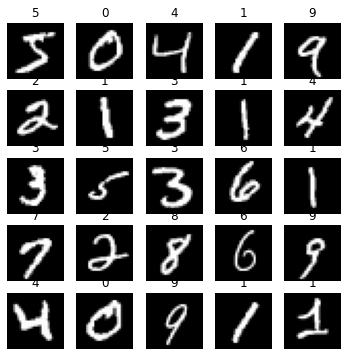

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
#25 개의 이미지 데이터 출력

for idx in range(25):
    
    plt.subplot(5,5, idx + 1)
    plt.imshow(xtr[idx], cmap = 'gray')
    plt.axis('off')
    plt.title(str(ytr[idx]))
    
plt.show()

In [18]:
# 데이터 전처리

#학습/ 테스트 데이터 정규화(MinMax)

xtr = (xtr - 0.0)/(255.0 - 0.0)
xt = (xt - 0.0)/(255.0 - 0.0)
#데이터 max - 255.0, min - 0.0

#정답 데이터 원핫 인코딩

ytr = tf.keras.utils.to_categorical(ytr, num_classes = 10) 
yt = tf.keras.utils.to_categorical(yt, num_classes = 10)
#MNIST 정답 데이터는 총 10개(0~9) 이므로, 총 열 개의 리스트를 생성 후 인코딩

In [20]:
# 모델링

md = tf.keras.Sequential()

md.add(tf.keras.layers.Flatten(input_shape = (28,28)))
#28*28 크기의 2차원 이미지를 784개의 1차원 벡터로 변환

md.add(tf.keras.layers.Dense(50, activation = 'relu'))
#은닉층 - 50 개로 임의 설정, relu 활성화 함수 사용

md.add(tf.keras.layers.Dense(10, activation = 'softmax'))
#출력층 - MNIST 정답 데이터는 총 10개(0~9)

In [22]:
# 컴파일

md.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),\
          loss = 'categorical_crossentropy', metrics = ['accuracy'])
#categorical_crossentropy - 원핫 인코딩 사용했을때 손실 함수
#sparse_categorical_crossentropy - 원핫 인코딩 사용하지 않았을 때 손실 함수

md.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 모델 학습

hist = md.fit(xtr, ytr, epochs = 30, validation_split = 0.3)
#validation data 30 % 생성 후 예측 모델의 overfitting 확인

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3577 - accuracy: 0.9003 - val_loss: 0.2157 - val_accuracy: 0.9378
Epoch 2/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1795 - accuracy: 0.9481 - val_loss: 0.1771 - val_accuracy: 0.9488
Epoch 3/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1349 - accuracy: 0.9599 - val_loss: 0.1473 - val_accuracy: 0.9572
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1062 - accuracy: 0.9681 - val_loss: 0.1379 - val_accuracy: 0.9606
Epoch 5/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0891 - accuracy: 0.9725 - val_loss: 0.1292 - val_accuracy: 0.9618
Epoch 6/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0744 - accuracy: 0.9779 - val_loss: 0.1295 - val_accuracy: 0.9632
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0641 - accuracy: 0.9809 - val_loss: 0.1177 - val_accuracy:

In [24]:
# 모델 평가

md.evaluate(xt, yt)

313/313 [==============================] - 1s 2ms/step - loss: 0.1552 - accuracy: 0.9701


[0.155206099152565, 0.9700999855995178]

*생성된 모델의 약 97% 예측 정확도를 확인했습니다.

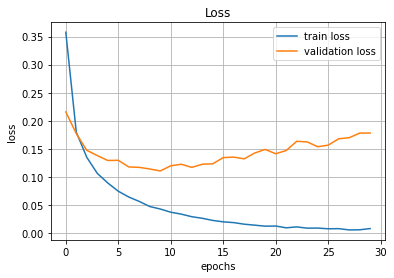

In [26]:
# 손실 및 정확도

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

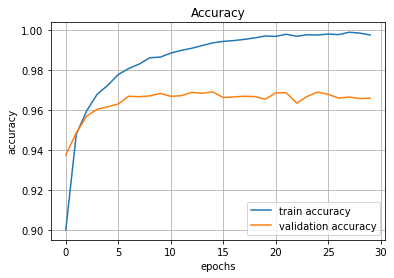

In [27]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

*0.96 의 정확도 이상으로 train data 에 대한 모델의 overfitting 이 일어나는 것을 확인할 수 있었습니다.

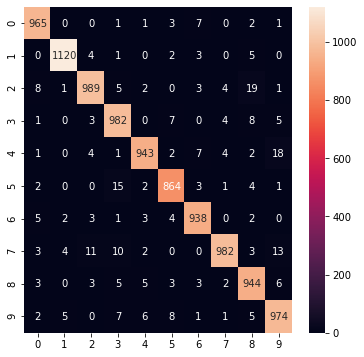

In [29]:
# 혼동 행렬

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

pred = md.predict(xt)
#테스트 데이터 예측

cm = confusion_matrix(np.argmax(yt, axis = -1),
                      #테스트 데이터에 대한 정답
                      np.argmax(pred, axis = -1))
                      #예측값

sns.heatmap(cm, annot = True, fmt = 'd')
#혼동 행렬 히트맵 시각화

plt.show()

In [31]:
for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % 
          (i, np.max(cm[i]), np.sum(cm[i]), 
           np.max(cm[i])/np.sum(cm[i])))

label = 0	(965/980)	accuracy = 0.985
label = 1	(1120/1135)	accuracy = 0.987
label = 2	(989/1032)	accuracy = 0.958
label = 3	(982/1010)	accuracy = 0.972
label = 4	(943/982)	accuracy = 0.960
label = 5	(864/892)	accuracy = 0.969
label = 6	(938/958)	accuracy = 0.979
label = 7	(982/1028)	accuracy = 0.955
label = 8	(944/974)	accuracy = 0.969
label = 9	(974/1009)	accuracy = 0.965


*숫자 1에 대해 가장 높은 정확도(0.987), 숫자 7에 대해 가장 낮은 정확도(0.955) 를 보였습니다.